# 2D Manipulator Motion Planner

## Project Overview

This project creates a three link robotic arm that operates in a 2D plane. Through the 2DManipulator class, one is able to create one of these robots with different link sizes. The LinkLengths attribute represent each individual link size. The res attribute represents the resolution of the discretization of all possible joint angles, the higher the resolution the more precise the movement, although the algorithm becomes slower.

## Initialize the robot

In [5]:
import manipulator
import numpy as np
from manipulator.manipulator import Manipulator2D

robot = Manipulator2D(LinkLengths=(1,1,1), name="2D Manipulator Robot", res = 101)

## Create the robot's workspace

By default, the robot is created with each of its relative joint angles being set to 0. This can be changed by calling the updatePositions() function and giving it a list of the new desired joint angles. It is important to note that these angles must be in the range from -π to π. For this experiment, we will keep the original joint angles as is. You can visualize the robot's current configuration by running the plotRobot() function. The angles seen in the plot will be the closest discretized angles to the desired value.

In order to represent obstacles in the robot's configuration space, one can use the obstacle class to represent circular obstacles in the space.

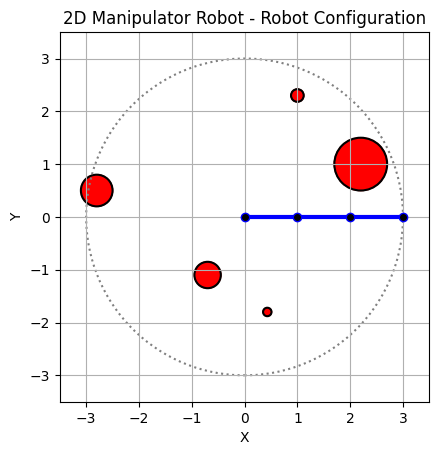

In [6]:
from manipulator.obstacle import Obstacle

# Arbitrary obstacles
obstacles = [Obstacle((1.0, 2.3), 0.12),
             Obstacle((-0.7, -1.1), 0.25),
             Obstacle((0.43, -1.8), 0.08),
             Obstacle((-2.8, 0.5), 0.3),
             Obstacle((2.2, 1), 0.5)]

# Add obstacles to the robot's configuration space
for i in obstacles:
    robot.addObstacle(i)

# Visualize Robot Plot
robot.plotRobot()

## Generation of the Robot's Joint Space
Once all obstacles have been added, one can calculate the robot's configuration space by running the generateCSpace() function. This is the most computationally expensive function with a time complexity of O(n^3). It checks every possible robot configuration and stores where the robot intersects an obstacle in a 3D matrix of size res. It provides an additional value offset if the user wishes to enlarge the minimum distance the robot has to keep from each of the obstacles. One can visualize the configuration space by running the plotCSpace() function

c:\Users\alexr\Desktop\PersonalProjects\GitHub Repos\2DManipulatorPlanner\manipulator\manipulator.py:229: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


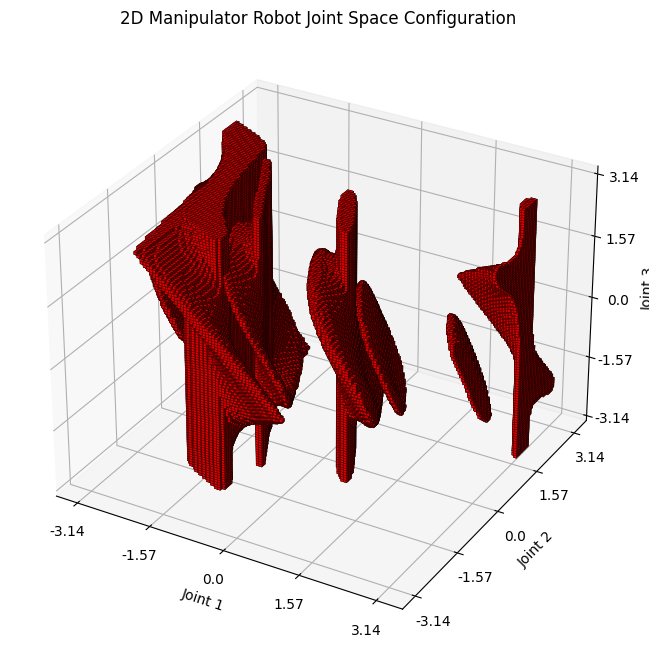

In [7]:
robot.generateCSpace(offset=0.05)
robot.plotCSpace()

## Computing a path between two points
For the motion planning problem, the robot arm will calculate it's trajectory according to it's joint space using the A* algorithm. This algorithm does not guarantee the fastest path however, it is computationally more efficient than other algorithms such as BFS or DFS. One can create this path by giving the robot a desired start and end position. If no paths can be found, the function will return False. There are multiple paths that can be found due to the variety of configurations the robot may have for the same end position. Therefore, the motionPlanner() function will only return the first path it finds.

In [ ]:
start_point = (3.0, 0.0)
phiA = 0.0

end_point = (-3.0, 0.0)
phiB = -np.pi

path = robot.motionPlanner(start_point, end_point, phiA, phiB, True)
robot.animateRobot(path, interval=100, save=True, name="simulation_example.gif")

### Example:
![Robot Arm Animation](assets/simulation_example.gif)

## Future Work:
Additional work on this project includes parallelizing the generateCSpace() function to optimize faster generation. Additionally, including a end-effector tool to be able to realize work could be useful for more real world application. This project reaches only up to the dynamical workings on the system and does not take into consideration individual joint controllers.